In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import os
from PIL import Image
from nltk.tokenize import word_tokenize
import itertools
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file1 = open('data/Flickr8k_text/Flickr8k.token.txt', 'r')
Lines = file1.readlines()
  
count = 0

pictures = []
cap_nums = []
descs = []

for line in Lines:
    count += 1
    words = line.split()
    words = [i.lower() for i in words]
    words = [i for i in words if i != "a"]
    csv_clean = [0] * 2
    pictures.append(words[0].split("#")[0])
    cap_nums.append(words[0].split("#")[1])

    descs.append(" ".join(words[1:][:-1]))
    
df = pd.DataFrame()
df["pictures"] = pictures
df["captions"] = descs

FileNotFoundError: ignored

In [ ]:
base_path = '/content/drive/MyDrive/flickr/flickr8k/'
image_folder_path = base_path+ 'images/'


In [ ]:
df = pd.read_csv(base_path+"captions.txt")

In [ ]:
df["caption"] = df.caption.str.lower()

In [ ]:
df['caption'] = df['caption'].apply(lambda x: " ".join(x.split()[0:-1]))


In [ ]:
df["full_path"] = base_path + "images/" + df["image"]

In [ ]:
df

,image,caption,full_path
0,1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set o...,/content/drive/MyDrive/flickr/flickr8k/images/...
1,1000268201_693b08cb0e.jpg,a girl going into a wooden building,/content/drive/MyDrive/flickr/flickr8k/images/...
2,1000268201_693b08cb0e.jpg,a little girl climbing into a wooden playhouse,/content/drive/MyDrive/flickr/flickr8k/images/...
3,1000268201_693b08cb0e.jpg,a little girl climbing the stairs to her playh...,/content/drive/MyDrive/flickr/flickr8k/images/...
4,1000268201_693b08cb0e.jpg,a little girl in a pink dress going into a woo...,/content/drive/MyDrive/flickr/flickr8k/images/...
...,...,...,...
40450,997722733_0cb5439472.jpg,a man in a pink shirt climbs a rock,/content/drive/MyDrive/flickr/flickr8k/images/...
40451,997722733_0cb5439472.jpg,a man is rock climbing high in the air,/content/drive/MyDrive/flickr/flickr8k/images/...
40452,997722733_0cb5439472.jpg,a person in a red shirt climbing up a rock fac...,/content/drive/MyDrive/flickr/flickr8k/images/...
40453,997722733_0cb5439472.jpg,a rock climber in a red shirt,/content/drive/MyDrive/flickr/flickr8k/images/...


In [ ]:
df['exists'] = df['full_path'].astype(str).map(os.path.exists)

In [ ]:
df

,image,caption,full_path,exists
0,1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set o...,/content/drive/MyDrive/flickr/flickr8k/images/...,True
1,1000268201_693b08cb0e.jpg,a girl going into a wooden building,/content/drive/MyDrive/flickr/flickr8k/images/...,True
2,1000268201_693b08cb0e.jpg,a little girl climbing into a wooden playhouse,/content/drive/MyDrive/flickr/flickr8k/images/...,True
3,1000268201_693b08cb0e.jpg,a little girl climbing the stairs to her playh...,/content/drive/MyDrive/flickr/flickr8k/images/...,True
4,1000268201_693b08cb0e.jpg,a little girl in a pink dress going into a woo...,/content/drive/MyDrive/flickr/flickr8k/images/...,True
...,...,...,...,...
40450,997722733_0cb5439472.jpg,a man in a pink shirt climbs a rock,/content/drive/MyDrive/flickr/flickr8k/images/...,True
40451,997722733_0cb5439472.jpg,a man is rock climbing high in the air,/content/drive/MyDrive/flickr/flickr8k/images/...,True
40452,997722733_0cb5439472.jpg,a person in a red shirt climbing up a rock fac...,/content/drive/MyDrive/flickr/flickr8k/images/...,True
40453,997722733_0cb5439472.jpg,a rock climber in a red shirt,/content/drive/MyDrive/flickr/flickr8k/images/...,True


In [ ]:
df = df[df['exists'] == True][["image", 'caption']]

In [ ]:
df.iloc[0]["caption"]

'a child in a pink dress is climbing up a set of stairs in an entry way'

In [ ]:
len(df["image"].unique())

8091

In [ ]:
print("Number of captions with less than 2 words:", sum([1 if len(i.split()) < 2 else 0 for i in df["caption"]]))
print("Number of captions with less than 1 words:", sum([1 if len(i.split()) < 1 else 0 for i in df["caption"]]))

Number of captions with less than 2 words: 17
Number of captions with less than 1 words: 2


In [ ]:
drop_index = np.where(np.array([1 if len(i.split()) < 1 else 0 for i in df["caption"]]) == 1)[0]

In [ ]:
drop_index

array([ 9305, 33360])

In [ ]:
df = df[~df.index.isin(drop_index)]

In [ ]:
df = df.reset_index()

In [ ]:
def get_image_and_caption(image_path):
    full_path = image_folder_path+image_path
    img = Image.open(full_path)
    display(img)

    
    for idx, row in df[df['image'] == image_path].iterrows():
        print(row["caption"])


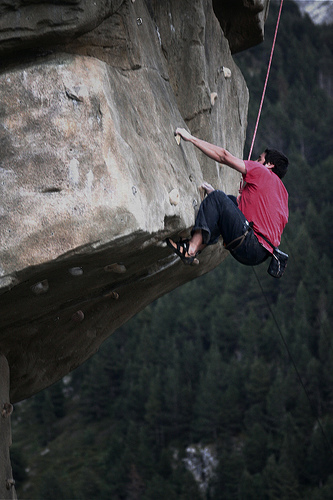

a man in a pink shirt climbs a rock
a man is rock climbing high in the air
a person in a red shirt climbing up a rock face covered in assist handles
a rock climber in a red shirt
a rock climber practices on a rock climbing wall


In [ ]:
get_image_and_caption('997722733_0cb5439472.jpg')

In [ ]:
df[df["image"] == "2258277193_586949ec62.jpg.1"]

,index,image,caption


In [ ]:
class CustomDataset(torch.utils.data.Dataset):

    def __init__(self, images, captions, transform, min_threshold):
        
        self.images = images
        self.captions = captions
        self.transform = transform
        self.min_threshold = min_threshold

        self.vocab = None
        self.word_to_idx = None
        self.idx_to_word = None
        self.count_word = None

        self.build_vocab()

    def build_vocab(self):

        self.count_word = dict(Counter(word for sentence in list(self.captions) for word in sentence.split()))

        vocab = list(self.captions.str.split(' ', expand=True).stack().value_counts().index)
        vocab_size = len(vocab)
        
        self.captions.apply(word_tokenize)
        
        # converting text to intergers
        corpus = list(self.captions)
        token_docs = [doc.split() for doc in corpus]
        all_tokens = set([word for sentence in token_docs for word in sentence])
        self.word_to_idx = {token:idx+1 for idx, token in enumerate(all_tokens)}

        new_word_to_idx = {}
        for word in self.word_to_idx.keys():
            if self.count_word[word] >= self.min_threshold:
                new_word_to_idx[word] = self.word_to_idx[word]
        
        self.word_to_idx = new_word_to_idx
        
        # print(token_docs)
        
        self.word_to_idx["PAD"] = 0
        self.word_to_idx["START"] = vocab_size+1
        self.word_to_idx["END"] = vocab_size+2
        self.word_to_idx["UNKNOWN"] = vocab_size+3
        
        # phrases_to_num = []
        # for phrase in token_docs:
        #     phrase_to_num = []
        #     for word in phrase:
        #         try:
        #             phrase_to_num.append(self.word_to_idx[word])
        #         except KeyError:
        #             phrase_to_num.append(self.word_to_idx["UNKNOWN"])
            
        #     phrases_to_num.append(phrase_to_num)
        

        # X = np.array(phrases_to_num)
        # pad_token = 0
        # X = zip(*itertools.zip_longest(*X, fillvalue=pad_token))
    
        # df_tokens = pd.DataFrame(X) 

        

        self.idx_to_word = {v: k for k, v in self.word_to_idx.items()}

    
    def get_word_to_idx(self):
        return self.word_to_idx
    
    def get_idx_to_word(self):
        return self.idx_to_word
    
    def get_vocab(self):
        return self.vocab

    def encode(self, caption):

        converted_text = []
        for word in caption.split():
            try:
                converted_text.append(self.word_to_idx[word])
            except KeyError:
                converted_text.append(self.word_to_idx["UNKNOWN"])
        
        return converted_text


    def __len__(self):
        return len(self.captions)

    def __getitem__(self, idx):
        caption = self.encode(self.captions[idx])
 

        caption.insert(0, self.word_to_idx["START"])
        caption.append(self.word_to_idx["END"])

        caption= torch.tensor(caption)

        image = Image.open(image_folder_path + self.images[idx]).convert("RGB")
        

        # Convert the image to PyTorch tensor
        image = self.transform(image)
        #print('returning image')
        
        return image, caption





        

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
transforms = torchvision.transforms.Compose([
        torchvision.transforms.RandomResizedCrop(224),

        torchvision.transforms.PILToTensor(),

    ])

#transforms = torchvision.transforms.Compose([torchvision.transforms.PILToTensor()])

dataset = CustomDataset(df["image"], df["caption"],transforms, 1)

In [ ]:
class CustomCollate:
    """
    Collate to apply the padding to the captions with dataloader
    """
    def __init__(self,pad_idx,batch_first=False):
        self.pad_idx = pad_idx
        self.batch_first = batch_first
    
    def __call__(self,batch):
        imgs = [item[0].unsqueeze(0) for item in batch]
        imgs = torch.cat(imgs,dim=0)
        
        targets = [item[1] for item in batch]
        targets = torch.nn.utils.rnn.pad_sequence(targets, batch_first=self.batch_first, padding_value=self.pad_idx)
        return imgs,targets

tensor([8845,  555, 4898, 6538, 7034, 8473, 2494, 8452, 7721, 8452, 3142, 6379,
        2648, 6066, 8473, 8846,    0,    0,    0,    0,    0,    0])


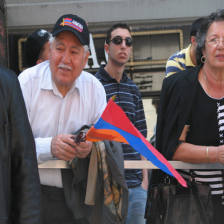

an older man with a red , blue , and orange flag in a
tensor([8845, 1921,  361,  916, 8452, 4229, 6406, 2011, 8452, 5374, 6066, 1921,
        6154, 6803, 8473,  970, 4410, 8452, 6597, 6789, 6072, 8846])


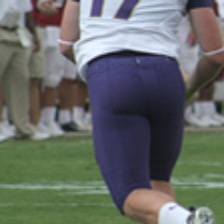

the two players , on opposite teams , are in the middle of a football game , while others watch
tensor([8845, 8473, 1377, 3074, 2830, 1979, 6573, 7431, 7000, 2527, 1921, 6349,
        6803, 8473,  159, 6066, 8473, 5769, 8846,    0,    0,    0])


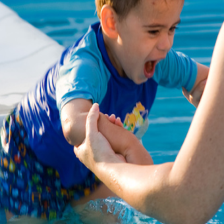

a young curly brown headed boy is jumping into the arms of a woman in a pool
tensor([8845,  361, 2245, 1518, 7034, 1473, 8452, 7557, 1563, 8452, 6806, 6066,
         802, 6803, 8473, 6888, 8846,    0,    0,    0,    0,    0])


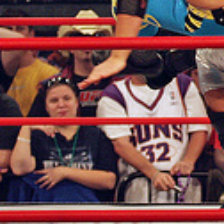

two female wrestlers with long , blonde hair , fighting in front of a crowd


In [ ]:
BATCH_SIZE = 4
NUM_WORKER = 0

data_loader = torch.utils.data.DataLoader(
    dataset=dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKER,
    shuffle=True,
    collate_fn = CustomCollate(pad_idx=dataset.word_to_idx["PAD"], batch_first=True))

batch = next(iter(data_loader))
images, captions = batch

for i in range(BATCH_SIZE):
    img, cap = images[i], captions[i]
    print(cap)
    caption_label = [dataset.idx_to_word[token] for token in cap.tolist()]
    eos_index = caption_label.index('END')
    caption_label = caption_label[1:eos_index]
    caption_label = ' '.join(caption_label)                      
    transform = torchvision.transforms.ToPILImage()
    image_picture = transform(img)
    display(image_picture)
    print(caption_label)

In [ ]:
BATCH_SIZE = 32
NUM_WORKER = 0

data_loader = torch.utils.data.DataLoader(
    dataset=dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKER,
    shuffle=True,
    collate_fn = CustomCollate(pad_idx=dataset.word_to_idx["PAD"], batch_first=False))

In [71]:
class CNN(torch.nn.Module):
    def __init__(self, embedding_size):
        super().__init__()

        self.layers = torch.nn.Sequential(*list(torchvision.models.resnet50(pretrained=True).children())[:-1])
        self.linear = torch.nn.Linear(2048, embedding_size)
    def forward(self, input_tensor):
        return self.linear(self.layers(input_tensor).squeeze(2).squeeze(2))

class LSTM(torch.nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size = 256, num_layers = 1, dropout = .2):
        super().__init__()

        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.output_size = vocab_size

        self.linear = torch.nn.Linear(2048, 256)
        self.relu = torch.nn.ReLU()
        self.embedding = torch.nn.Embedding(vocab_size, embedding_size)

        self.lstm = torch.nn.LSTM(embedding_size, num_layers = self.num_layers, hidden_size=self.hidden_size, batch_first=False)
       
        #self.output = torch.nn.Softmax(self.hidden_size, self.output_size)
        self.output = torch.nn.Linear(self.hidden_size,self.output_size)


    def forward(self, features, captions):
       
       
        hidden = (torch.zeros(self.num_layers, features.shape[0], self.hidden_size).to(device), torch.zeros(self.num_layers, features.shape[0], self.hidden_size).to(device))
       
        embeddings = self.embedding(captions)
        # print("Embedding Shape", embeddings.shape)
        # print("Feature concat input Shape", features.unsqueeze(1).shape)

        
        embeddings = torch.cat((features.unsqueeze(0), embeddings), dim=0)
        # print("Embedding Shape Post concat", embeddings.shape)
        lstm_out, _ = self.lstm(embeddings, hidden)
        return self.output(lstm_out)
    
   



class Network(torch.nn.Module):
    def __init__(self,vocab_size, embedding_size, hidden_size = 256, num_layers = 1, dropout = .2):
        super().__init__()
        self.cnn = CNN(embedding_size)
        self.lstm = LSTM(vocab_size, embedding_size, hidden_size=hidden_size, num_layers=num_layers, dropout=dropout)
   
    def forward(self, images, captions):
        return self.lstm(self.cnn(images), captions)

    
    def predict_caption(self, image, idx_to_word, max_length=36, states=None):
        features = self.cnn(image)
        
        batch_size = features.size(0)
        encoder_dim = features.size(-1)
        
        encoder_out = encoder_out.view(batch_size, -1, encoder_dim) 

        predicted = torch.tensor(idx_to_word["START"]).to(device)
        
        pred_caption = []

        pred = self.lstm(features, states)
        while True:
            
            pred_word_index = pred.argmax(1)

            pred_word = idx_to_word[pred_word_index]
            pred_caption.append(pred_word)

            if pred_word == "END" or len(pred_caption) >= max_length:
                break
            
        return " ".join(pred_caption)


In [72]:
#device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [73]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Nov 30 07:33:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    33W /  70W |  13368MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [74]:
device

device(type='cuda')

In [75]:
len(dataset.word_to_idx)

8848

In [76]:
len(dataset.images) == len(dataset.captions)

True

In [77]:
epochs = 10

lr = .0001

#model = CNNtoRNN(vocab_size = len(dataset.word_to_idx), embed_size=256, hidden_size=256, num_layers=1 )
model = Network(vocab_size = len(dataset.word_to_idx), embedding_size=256)

pad_index = dataset.word_to_idx["PAD"]
loss_func = torch.nn.CrossEntropyLoss(ignore_index=pad_index)
optim = torch.optim.Adam(model.parameters(), lr=lr)

for epoch in range(epochs):
    print(epoch)
    model.train()
    for idx, (images, captions) in enumerate(iter(data_loader)):
      print(idx/len(data_loader))
       
      # print("image")
      images = images.float().to(device)
      # print("caption")
      captions = captions.to(device).long()
      # print("caption example", captions[0])
      # print("target")
      #target = captions[:,1:]
      target = captions.reshape(-1)
      # print("target example",target[0])
      # print(target.shape)
      # print("train_cap")
      train_cap = captions[:-1]
      # print("training example",train_cap[0])
      # print(train_cap.shape)
      # print("model")
      model.to(device)
      pred = model(images, train_cap)
      # print("pred shape",pred.shape)
      # print("loss")
      # print("pred loss input",pred.view(-1, len(dataset.word_to_idx)).shape)
      # print("true loss input", target.contiguous().view(-1).shape)

      #loss = loss_func(pred.view(-1, len(dataset.word_to_idx)), target)
      loss = loss_func(pred.view(-1, len(dataset.word_to_idx)), target)
      
      
      
      loss.backward()
      
      optim.step()
      




/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


0
0.0
0.0007905138339920949
0.0015810276679841897
0.0023715415019762848
0.0031620553359683794
0.003952569169960474
0.0047430830039525695
0.005533596837944664
0.006324110671936759
0.0071146245059288534
0.007905138339920948
0.008695652173913044


KeyboardInterrupt: ignored

In [82]:
img, _ = dataset[0]

In [97]:
img[0:1]

tensor([[[[222, 224, 226,  ..., 215, 214, 217],
          [230, 232, 230,  ..., 210, 212, 221],
          [235, 235, 222,  ..., 212, 219, 222],
          ...,
          [  5,   5,  10,  ..., 207, 211, 204],
          [  8,   8,  12,  ..., 195, 198, 190],
          [ 13,  13,   9,  ..., 204, 212, 213]],

         [[222, 219, 217,  ..., 211, 204, 210],
          [224, 223, 223,  ..., 204, 211, 212],
          [223, 228, 221,  ..., 206, 217, 213],
          ...,
          [ 25,  27,  30,  ..., 198, 197, 190],
          [ 22,  28,  30,  ..., 192, 192, 185],
          [ 18,  27,  33,  ..., 204, 212, 209]],

         [[208, 211, 209,  ..., 189, 193, 199],
          [215, 219, 211,  ..., 185, 194, 203],
          [224, 220, 204,  ..., 194, 202, 204],
          ...,
          [ 36,  45,  49,  ..., 181, 183, 165],
          [ 48,  51,  48,  ..., 173, 173, 157],
          [ 50,  54,  47,  ..., 182, 190, 191]]]], dtype=torch.uint8)

In [96]:
dataiter = iter(data_loader)
img,_ = next(dataiter)
# features = model.cnn(img[0:1].to(device))
caps,alphas = model.predict_caption(img[0:1].float().to(device),dataset.get_idx_to_word())
caption = ' '.join(caps)
          

TypeError: ignored

In [87]:
type(img.float().to(device))

torch.Tensor

In [92]:
model.to(device)
model.predict_caption(img.float().to(device), dataset.get_idx_to_word())

ValueError: ignored

In [ ]:
adataset[333]

(tensor([[[ 62,  58,  51,  ...,  77,  78,  76],
          [ 39,  39,  45,  ...,  83,  79,  79],
          [ 48,  38,  44,  ...,  83,  86,  84],
          ...,
          [190, 186, 169,  ..., 178, 198, 160],
          [182, 207, 178,  ..., 173, 173, 198],
          [196, 183, 190,  ..., 182, 166, 178]],
 
         [[ 48,  48,  41,  ...,  56,  58,  58],
          [ 35,  40,  32,  ...,  64,  60,  62],
          [ 37,  39,  39,  ...,  63,  67,  67],
          ...,
          [155, 163, 134,  ..., 127, 141, 104],
          [144, 166, 148,  ..., 123, 109, 151],
          [177, 113, 160,  ..., 125, 105, 115]],
 
         [[ 45,  46,  39,  ...,  53,  57,  56],
          [ 30,  35,  31,  ...,  58,  54,  55],
          [ 35,  34,  36,  ...,  57,  60,  59],
          ...,
          [141, 141, 117,  ...,  98, 114,  79],
          [131, 149, 128,  ...,  98,  87, 123],
          [159, 107, 142,  ...,  95,  85,  89]]], dtype=torch.uint8),
 tensor([8845, 1921, 4803, 7431, 6066, 8473, 3837, 8452, 7880, 

In [ ]:
temp_model = CNN(256)

In [ ]:
img = Image.open("Images/667626_18933d713e.jpg")
img = transforms(img)

In [ ]:
temp_model(img.unsqueeze(0).float())

tensor([[-2.7570e-01,  1.1496e-01,  2.7418e-01,  4.6695e-01,  4.1046e-02,
          2.1494e-02,  3.1374e-01,  1.3658e-01,  2.5909e-03, -3.0158e-01,
         -2.9717e-01, -1.6038e-01,  3.6982e-01,  4.5551e-02, -4.4387e-01,
          4.9116e-01,  2.6547e-01, -1.1280e-02, -2.5781e-02, -1.8436e-01,
          3.3472e-01, -2.8738e-01, -2.2841e-01,  2.2911e-01,  5.0604e-01,
         -3.6215e-01, -2.7025e-01,  9.8693e-02, -1.3965e-01,  7.3366e-02,
          8.2643e-02,  1.1725e-01,  4.4660e-02, -1.6898e-01, -3.3871e-01,
         -8.7577e-03, -2.2832e-01, -1.6849e-01, -4.3165e-01, -4.6366e-01,
          2.7165e-01,  3.3057e-01,  7.7817e-02, -2.0887e-01,  6.5884e-03,
         -9.8638e-02, -4.9264e-02, -2.9731e-01,  1.0956e-01, -1.5979e-01,
         -4.0408e-02, -4.3630e-02, -1.5239e-01, -3.4591e-02,  2.4261e-01,
          4.6178e-02,  3.9034e-02,  1.7555e-01,  8.5610e-02,  1.1642e-01,
         -1.1083e-02, -2.6614e-01, -9.3856e-02, -3.8863e-01,  6.1515e-01,
          2.7804e-01,  2.9398e-01,  4.

In [ ]:
images, captions = dataiter.next()

AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'

In [ ]:
next(iter(data_loader))

: 

: 

In [ ]:
#generating the iterator from the dataloader
dataiter = iter(data_loader)

#getting the next batch
batch = next(dataiter)

#unpacking the batch
images, captions = batch

#showing info of image in single batch
for i in range(BATCH_SIZE):
    img,caption = images[i],captions[i]
    caption_label = [dataset.idx_to_word[token] for token in caption.tolist()]
    eos_index = caption_label.index('END')
    caption_label = caption_label[1:eos_index]
    caption_label = ' '.join(caption_label)                      
    transform = torchvision.transforms.ToPILImage()
    image_picture = transform(img)
    image_picture.show()

: 

: 

In [ ]:
from torch.nn.utils.rnn import pad_sequence  # pad batch



In [ ]:
caption

tensor([8844, 4199, 6735, 5930, 6612, 5099, 5217, 6736, 7310, 1743, 2801, 6735,
        5390, 7904, 6865, 8845])

tensor([[[[1.4783, 1.5639, 1.6667,  ..., 1.7523, 1.6838, 1.4783],
          [1.5297, 1.5982, 1.6495,  ..., 1.7009, 1.5810, 1.3584],
          [1.6153, 1.6324, 1.5982,  ..., 1.6495, 1.4612, 1.2385],
          ...,
          [0.9646, 1.2214, 1.3584,  ..., 1.9578, 1.9064, 2.0263],
          [1.0844, 1.3584, 1.4612,  ..., 2.0434, 2.0605, 2.1462],
          [1.2385, 1.4783, 1.5468,  ..., 2.1290, 2.1975, 2.2489]],

         [[2.2535, 2.3060, 2.3585,  ..., 0.8179, 0.7829, 0.6604],
          [2.3060, 2.3235, 2.3235,  ..., 0.7654, 0.6779, 0.5553],
          [2.3585, 2.3410, 2.2535,  ..., 0.7129, 0.5903, 0.4853],
          ...,
          [1.4832, 1.7633, 1.9034,  ..., 2.0084, 1.9559, 2.0609],
          [1.6232, 1.9209, 2.0434,  ..., 2.1310, 2.1485, 2.2360],
          [1.7808, 2.0609, 2.1485,  ..., 2.2360, 2.3235, 2.3936]],

         [[2.5006, 2.5703, 2.6226,  ..., 0.6008, 0.5311, 0.4091],
          [2.5529, 2.5877, 2.5877,  ..., 0.6182, 0.4962, 0.3568],
          [2.6051, 2.6051, 2.5354,  ..., 0

In [ ]:
class Vocabulary:
    def __init__(self,freq_threshold):
        #setting the pre-reserved tokens int to string tokens
        self.itos = {0:"<PAD>",1:"<SOS>",2:"<EOS>",3:"<UNK>"}
        
        #string to int tokens
        #its reverse dict self.itos
        self.stoi = {v:k for k,v in self.itos.items()}
        
        self.freq_threshold = freq_threshold
        
    def __len__(self): return len(self.itos)
    
    @staticmethod
    def tokenize(text):
        return [token.text.lower() for token in spacy_eng.tokenizer(text)]
    
    def build_vocab(self, sentence_list):
        frequencies = Counter()
        idx = 4
        
        for sentence in sentence_list:
            for word in self.tokenize(sentence):
                frequencies[word] += 1
                
                #add the word to the vocab if it reaches minum frequecy threshold
                if frequencies[word] == self.freq_threshold:
                    self.stoi[word] = idx
                    self.itos[idx] = word
                    idx += 1
    
    def numericalize(self,text):
        """ For each word in the text corresponding index token for that word form the vocab built as list """
        tokenized_text = self.tokenize(text)
        return [ self.stoi[token] if token in self.stoi else self.stoi["<UNK>"] for token in tokenized_text ]    

In [ ]:
class FlickrDataset(torch.utils.data.Dataset):
    """
    FlickrDataset
    """
    def __init__(self,root_dir,captions_file,transform=None,freq_threshold=5):
        self.root_dir = root_dir
        self.df = pd.read_csv(captions_file)
        self.transform = transform
        
        #Get image and caption colum from the dataframe
        self.imgs = self.df["image"]
        self.captions = self.df["caption"]
        
        #Initialize vocabulary and build vocab
        self.vocab = Vocabulary(freq_threshold)
        self.vocab.build_vocab(self.captions.tolist())
        
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        caption = self.captions[idx]
        img_name = self.imgs[idx]
        img_location = os.path.join(self.root_dir,img_name)
        img = Image.open(img_location).convert("RGB")
        
        #apply the transfromation to the image
        if self.transform is not None:
            img = self.transform(img)
        
        #numericalize the caption text
        caption_vec = []
        caption_vec += [self.vocab.stoi["<SOS>"]]
        caption_vec += self.vocab.numericalize(caption)
        caption_vec += [self.vocab.stoi["<EOS>"]]
        
        return img, torch.tensor(caption_vec)

In [ ]:
#defing the transform to be applied
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ToTensor()
])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def show_image(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [ ]:

data_location =  "flickr8k"
#testing the dataset class
dataset =  FlickrDataset(
    root_dir = data_location+"/Images",
    captions_file = data_location+"/captions.txt",
    transform=transforms
)



img, caps = dataset[0]
show_image(img,"Image")
print("Token:",caps)
print("Sentence:")
print([dataset.vocab.itos[token] for token in caps.tolist()])

: 

: 